### Guide to Installing Hadoop on an Azure Virtual Machine

# 1. Creating a Virtual Machine (VM) in Azure

## 1.1 Logging into Azure Portal

Go to Azure Portal and log in to your account.

Click "Create a resource".

In the search bar, type "Virtual Machine" and select the corresponding result.

Click "Create".

## 1.2 Configuring the Virtual Machine

Resource Group: Create a new one or use an existing one.

VM Name: Example, Hadoop-VM.

Region: Choose the nearest region.

Image: Select Ubuntu Server 20.04 LTS.

Size: Choose Standard_B2s (suitable for testing).

Authentication:

Select SSH and provide an SSH key.

Leave the remaining settings as default.

## 1.3 Completing the Creation

Click "Review + Create".

Confirm settings and click "Create".

# 2. Connecting via Remote-SSH in Visual Studio Code

## 2.1 Installing the Remote-SSH Extension

Open VS Code.

Go to Extensions (Ctrl + Shift + X).

Search for and install the "Remote - SSH" extension.

## 2.2 Connecting to the Virtual Machine

Open Command Palette (Ctrl + Shift + P).

Select Remote-SSH: Connect to Host.

Enter the command:

In [ ]:
ssh -i "C:\path\to\Hadoop-Vm_key.pem" azureuser@<Public-IP>

## 2.3 (Optional) Configuring SSH

Open the config file at C:\Users\<YourUsername>\.ssh\config.

Add the following:

In [ ]:
Host hadoop-vm
    HostName <Public-IP>
    User azureuser
    IdentityFile "C:\Users\<YourUsername>\Desktop\Hadoop-Vm_key.pem"

# 3. Preparing the Virtual Machine

## 3.1 Updating Packages

In [ ]:
sudo apt update && sudo apt upgrade -y

## 3.2 Installing Additional Tools

In [ ]:
sudo apt install -y curl wget git

## 3.3 Installing Java (Required for Hadoop)

In [ ]:
sudo apt install -y openjdk-11-jdk

Apres il fault verifier version du java :

java -version

# 4. Installing Hadoop

## 4.1 Downloading Hadoop

Hadoop is a powerful tool used to store and process huge amounts of data across many computers. It’s used in big data projects to handle things that a single computer can’t manage

## What is Hadoop?
✅A system for storing and processing big data.

✅Can handle huge datasets (terabytes, petabytes).

✅Uses multiple computers (cluster) to work together.

✅Works best when data is too big for one machine.

## Main Parts of Hadoop

### HDFS (Hadoop Distributed File System) → Stores data across multiple machines.

✅ Data is broken into blocks and spread across computers.

✅ Keeps multiple copies (replication) for safety.

✅ MapReduce → Processes big data by splitting it into smaller tasks.

### Mapper: Breaks data into parts.

### Reducer: Combines results to get the final output.
✅ YARN (Yet Another Resource Negotiator) → Manages resources for running tasks.

✅ Decides which jobs run where.

✅ Hadoop Common → The basic tools and libraries used by Hadoop.

# Why Use Hadoop?
✅ Scalable → Works with hundreds or thousands of machines.

✅ Fault-Tolerant → If one machine fails, data is not lost.

✅ Cost-Effective → Uses cheap hardware instead of expensive servers.

✅ Open-Source → Free to use and modify.

✅ Flexible → Can store any type of data (structured, unstructured, logs, images).



4️⃣ How Hadoop Works? (Example)

✅Imagine you have 1,000 books and need to count all the words.

✅Without Hadoop → One person reads all books (takes forever).

✅With Hadoop → 100 people read 10 books each (much faster).

✅HDFS stores the books across 100 people.

✅MapReduce splits the work → each person counts words in their books.

✅Reducer combines all word counts for the final result.

In your VM in cmd write this command to install right version

In [ ]:
wget https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz

## 4.2 Extracting and Moving Hadoop

In [ ]:
tar -xzf hadoop-3.3.6.tar.gz

sudo mv hadoop-3.3.6 /usr/local/hadoop

## 4.3 Setting Environment Variables

#### Open ~/.bashrc:

In [ ]:
nano ~/.bashrc


Add the following lines:

export HADOOP_HOME=/usr/local/hadoop
export PATH=$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin
export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

Apply changes:

In [ ]:
source ~/.bashrc

You can check Hadoop version

In [ ]:
hadoop version

# 5. Configuring Hadoop

### 5.1 Configuring core-site.xml

<configuration>
    <property>
        <name>fs.defaultFS</name>
        <value>hdfs://localhost:9000</value>
    </property>
    <property>
        <name>hadoop.tmp.dir</name>
        <value>/usr/local/hadoop/tmp</value>
    </property>
</configuration>

### 5.2 Configuring hdfs-site.xml

<configuration>
    <property>
        <name>dfs.replication</name>
        <value>1</value>
    </property>
</configuration>

### 5.3 Configuring yarn-site.xml

<configuration>
    <property>
        <name>yarn.nodemanager.aux-services</name>
        <value>mapreduce_shuffle</value>
    </property>
</configuration>

## 6. Creating Hadoop Data Directories

In [ ]:
sudo mkdir -p /usr/local/hadoop/tmp /usr/local/hadoop/data/namenode /usr/local/hadoop/data/datanode
sudo chown -R $USER:$USER /usr/local/hadoop

## 7. Starting Hadoop

### 7.1 Formatting HDFS

In [ ]:
hdfs namenode -format

### 7.2 Starting Hadoop Services

In [ ]:
start-dfs.sh
start-yarn.sh

### 7.3 Checking Services

## Expected output:
NameNode

DataNode

ResourceManager

NodeManager

## 8. Opening Ports in Azure for Hadoop Web UI

In Azure Portal, go to the Network settings of the virtual machine.

### Add the following rules:

9870 (NameNode UI) – Allow TCP from any source.

8088 (ResourceManager UI) – Allow TCP from any source.

### Check accessibility:

http://<Public-IP>:9870 (NameNode UI)

http://<Public-IP>:8088 (ResourceManager UI)

## Final Verification

### Run:

  Code : hadoop version

Check web interfaces.

Ensure all services are running.

# Guide to Reproducing HDFS Structure and Comparing MapReduce with Spark

# 1. Preparing Hadoop and HDFS

Before creating the HDFS directory structure, ensure Hadoop is running properly:

# 1.1 Start Hadoop Services

Run the following command to check if Hadoop services are active:

In [ ]:
jps

Expected output (or similar):

In [ ]:
NameNode
DataNode
ResourceManager
NodeManager
SecondaryNameNode

If you don't have that output or similar you shoud launch first that command :

In [ ]:
start-dfs.sh && start-yarn.sh

## 2. Reproducing HDFS Data Structure

Recreate a production-like data structure in HDFS to simulate real-world data processing scenarios.

2.1 Creating Necessary HDFS Directories

To organize data effectively, create structured directories in HDFS:

In [ ]:
hdfs dfs -mkdir /data
hdfs dfs -mkdir /data/raw
hdfs dfs -mkdir /data/processed
hdfs dfs -mkdir /data/analytics

Use this command 

In [ ]:
hdfs dfs -ls /data

![alt text](image.png)

### 3. Comparing MapReduce with Spark

Reproduce a production-like data processing scenario and compare the performance and simplicity of MapReduce vs. Spark.

### 3.1 Counting Word/Sales Occurrences Using MapReduce

Create a simple MapReduce job to count word occurrences in a file stored in HDFS.

Mapper (mapper_csv.py)

In [ ]:
#!/usr/bin/env python3
import sys
for line in sys.stdin:
    print(1)

Reducer (reducer_csv.py)

In [ ]:
import sys
total_lines = 0
for line in sys.stdin:
    total_lines += int(line)
print(total_lines)

Run the MapReduce job using Hadoop Streaming:

In [ ]:
hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-*.jar \
    -input /data/raw/diamonds.csv \
    -output /data/processed/wordcount \
    -mapper mapper_csv.py \
    -reducer reducer_csv.py

Verify the output:

In [ ]:
hdfs dfs -cat /data/processed/wordcount/part-00000

This command sends an HTTP HEAD request to http://localhost:8088, which is the Hadoop YARN ResourceManager Web UI.

The -I option makes curl only fetch the headers of the response, without downloading the full content.

It helps check whether the ResourceManager service is running and responding on port 8088


This sends an HTTP HEAD request to http://localhost:9870, which is the Hadoop HDFS NameNode Web UI.

The -I option ensures only the HTTP headers are retrieved, allowing us to confirm if the NameNode web interface is accessible on port 9870.


In [ ]:
 curl -I http://localhost:8088
 curl -I http://localhost:9870

![alt text](image-1.png)

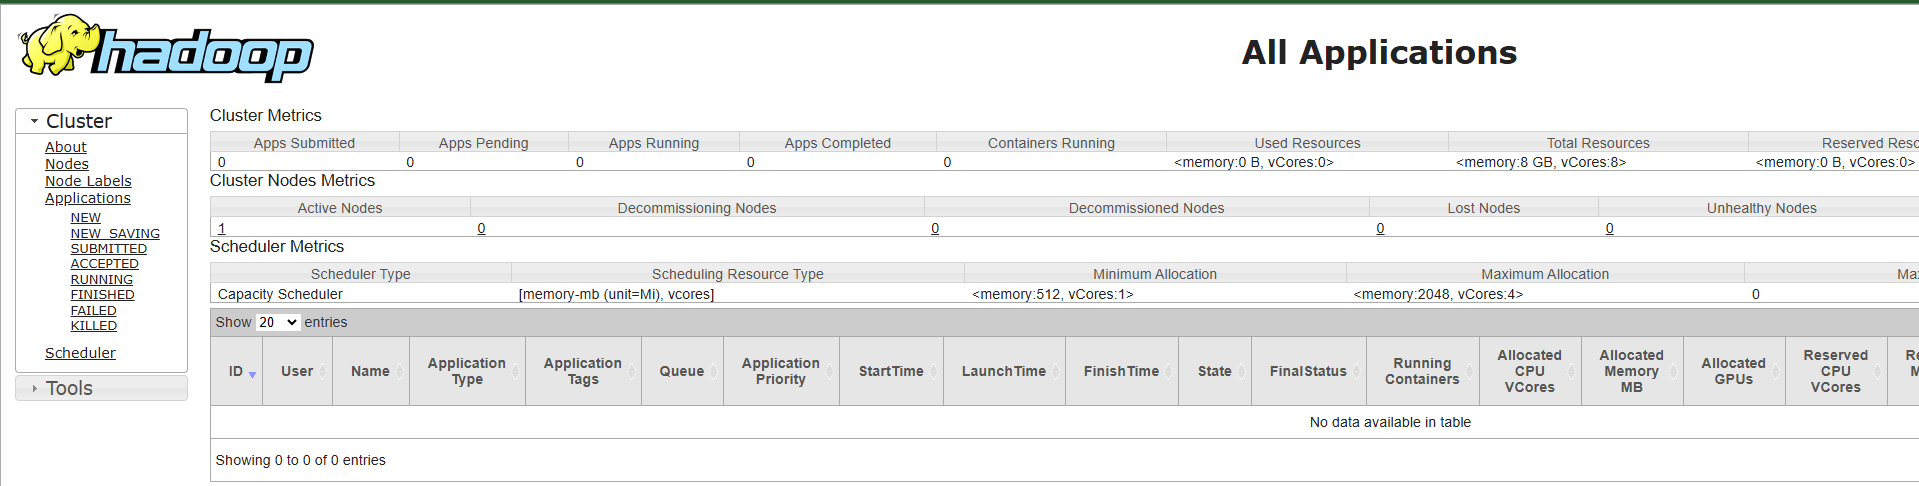

### Before uploading the dataset, the CSV file should be transferred from a local computer to the virtual machine. Run the following command on your local machine:

In [ ]:
scp -i "Hadoop-Vm_key.pem" "C:\Users\YourUser\Desktop\diamonds.csv" azureuser@<VM_PUBLIC_IP>:/home/azureuser/

This command securely copies the diamonds.csv file from your local computer to the home directory of the Azure virtual machine.

Once the file is available in the virtual machine, it can be uploaded to HDFS:

In [ ]:
hdfs dfs -put /home/azureuser/diamonds.csv /data/raw/

In [ ]:
hdfs dfs -ls /data/raw/ #Check if the file was successfully uploaded

1.1 Installing Apache Spark on the Virtual Machine

Apache Spark needs to be installed and configured before running Spark-based tasks. Follow these steps:

Step 1: Download and Extract Apache Spark

Extract the archive:

Move Spark to /usr/local/spark (ensure no conflicts exist):

In [ ]:
wget https://downloads.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
tar -xvzf spark-3.5.3-bin-hadoop3.tgz
sudo mv spark-3.5.3-bin-hadoop3 /usr/local/spark

Step 2: Set Up Environment Variables

Add the following lines to the ~/.bashrc file:

In [ ]:
export HADOOP_HOME=/usr/local/hadoop
export PATH=$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin

export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64
export PATH=$PATH:$JAVA_HOME/bin

export SPARK_HOME=/usr/local/spark
export PATH=$PATH:$SPARK_HOME/bin:$SPARK_HOME/sbin

Apply the changes:

source ~/.bashrc

Step 3: Verify the Installation

Check the installed version of Spark:

pyspark --version

Expected output:

In [ ]:
Spark 3.5.3
Using Scala version 2.12.18, OpenJDK 64-Bit Server VM, 11.0.25

## 3. Comparing MapReduce with Spark

Reproduce a production-like data processing scenario and compare the performance and simplicity of MapReduce vs. Spark.

### 3.1 Counting Word/Sales Occurrences Using MapReduce

Create a simple MapReduce job to count word occurrences in a file stored in HDFS.

Mapper (mapper_csv.py)

In [ ]:
#!/usr/bin/env python3
import sys
for line in sys.stdin:
    print(1)

Reducer (reducer_csv.py)

In [ ]:
import sys
total_lines = 0
for line in sys.stdin:
    total_lines += int(line)
print(total_lines)

Run the MapReduce job using Hadoop Streaming:

In [ ]:
hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-*.jar \
    -input /data/raw/diamonds.csv \
    -output /data/processed/diamonds \
    -mapper mapper_csv.py \
    -reducer reducer_csv.py

Verify the output:

In [ ]:
hdfs dfs -cat /data/processed/diamonds/part-00000

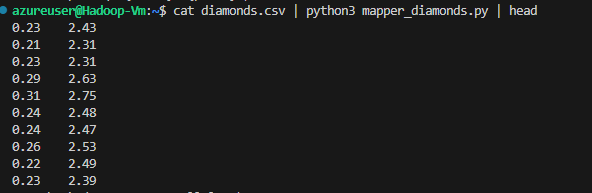

## Comparative Performance Analysis

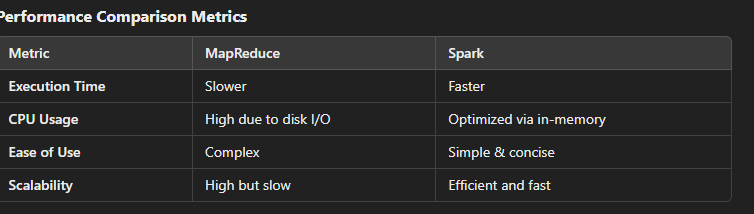

## When is MapReduce More Efficient?
Processing extremely large files that do not fit in memory.

Tasks that require strict batch processing without real-time needs.

## Limitations of MapReduce Compared to Spark
Higher I/O overhead.

More complex code structure.

Slower processing for iterative or interactive tasks.

## Conclusion
Spark proves to be the more efficient and user-friendly tool for processing large datasets in a distributed environment.However, MapReduce may still be useful for large-scale batch processing when computational resources are limited